In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from scipy import sparse
from IPython.display import Image

from mpl_toolkits.mplot3d import Axes3D

sns.set(style="ticks", color_codes=True)
%matplotlib inline

import os
import json

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

from datetime import datetime
import dateutil

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#For re-sizing
from skimage.transform import resize
from scipy import misc
import matplotlib.pyplot as plt
import skimage


Using TensorFlow backend.


In [2]:
paths = ["alexachung", "bucketlistjourney", "mariekondo", "jamieoliver", "gypsea_lust", 
         "kimkardashian", "tombrady", "ocasio2018"]
# filelist = os.listdir(path)
followers = {}
followers["alexachung"] = float(3300000)
followers["bucketlistjourney"] = float(100000)
followers["mariekondo"] = float(3000000)
followers["jamieoliver"] = float(6700000)
followers["gypsea_lust"] = float(2100000)
followers["kimkardashian"] = float(138000000)
followers["tombrady"] = float(6100000)
followers["ocasio2018"] = float(3400000)

In [3]:
# print(filelist)

In [4]:
image_arrays = []
for p in paths:
    filelist = os.listdir(p)
    for file in filelist:
        if str(file)[-1] != "g":
            continue
        pic = load_img(p + str("/") + str(file))
        arr = img_to_array(pic)
        image_arrays.append((p, str(file), arr))

In [5]:
# likes = {}
##alexachung
# likes['49515991_325105068134195_2502436908030754816_n.jpg'] = 70420/float(3300000)
# likes['57487966_302650897331937_5403985171049488247_n.jpg'] = 17348/float(3300000)
# likes['57511927_446139556140698_1423052042252082236_n.jpg'] = 65748/float(3300000)
# likes['57568586_144722209994647_2830766459764292268_n.jpg'] = 10895/float(3300000)
# likes['57598467_109244776838216_8820137001977022933_n.jpg'] = 40605/float(3300000)
# likes['57939604_1405275606280969_2279277994967177982_n.jpg'] = 23967/float(3300000)
# likes['58409673_1888377867934548_3131009389787177355_n.jpg'] = 10751/float(3300000)
# likes['58453539_318563102171701_5107544445594239315_n.jpg'] = 86223/float(3300000)
# likes['58994690_801384873562945_4583796651625414985_n.jpg'] = 11525/float(3300000)
# likes['59444228_294271814828332_6767495519858000574_n.jpg'] = 11413/float(3300000)
##bucketlistjourney
# likes['55833113_101630534350977_1094977877308446010_n.jpg'] = 1516/float(100000)
# likes['56551834_425069051389781_109123601724488242_n.jpg'] = 2101/float(100000)
# likes['56723983_2406294326067674_5616514260652929922_n.jpg']= 1537/float(100000)
# likes['57079872_417108132452805_7217303575806642240_n.jpg'] = 1648/float(100000)
# likes['57303614_417134662419576_8391179438478254088_n.jpg'] = 1893/float(100000)
# likes['57488073_1698865903746235_5017296675194952573_n.jpg'] = 1586/float(100000)
# likes['59121268_335244693724167_1568576480147494457_n.jpg'] = 1268/float(100000)
# likes['59653184_473330100071412_854043323488496358_n.jpg'] = 1430/float(100000)
# likes['59767226_464352457440775_6041614318666971112_n.jpg'] = 1527/float(100000)
## mariekondo
# likes['57156342_439041043332802_6453832952748634114_n.jpg'] = 41385/float(3000000)
# likes['57488299_116322816235392_585018211250187577_n.jpg'] = 50030/float(3000000)
# likes['58410871_2006268226148824_757526892481287304_n.jpg']= 20675/float(3000000)
# likes['58454153_164208737935546_2059782334648101007_n.jpg'] = 33805/float(3000000)
# likes['58633288_409904143168033_5649104692346330542_n.jpg'] = 55217/float(3000000)
# likes['58761690_440356990056612_3929126082977610222_n.jpg'] = 296716/float(3000000)
# likes['59168564_298866867672149_9098514675948050337_n.jpg'] = 78761/float(3000000)
# likes['59395411_533315747197450_3553175472566079939_n.jpg'] = 25392/float(3000000)
# likes['59578280_135526804257525_6333761325389553942_n.jpg'] = 16956/float(3000000)
# likes['60020974_135693017599477_3289982818027062878_n.jpg'] = 69548/float(3000000)
## jamieoliver


In [8]:
dataDict = {}
for path in paths:
    with open(path + str("/") + path + str(".json")) as f:
        data = json.load(f)
    dataDict[path] = data

likes = {}
final_arr = []
likes_array = []
for img in image_arrays:
    jsonData = dataDict[img[0]]
    for i in range(len(jsonData['GraphImages'])):
        if img[1] in jsonData['GraphImages'][i]["display_url"]:
            likes[img[1]] = jsonData['GraphImages'][i]["edge_media_preview_like"]["count"]/followers[img[0]]
            final_arr.append(img)
            likes_array.append(jsonData['GraphImages'][i]["edge_media_preview_like"]["count"]/followers[img[0]])
            

print(len(image_arrays))
print(len(likes))

print(final_arr)

print(len(final_arr))
print(len(likes))

# y = []
# for img in final_arr:
#     filename = img[1]
#     y.append(likes[filename]/followers[img[0]])
# print(y[0])

142
81
[('alexachung', '57939604_1405275606280969_2279277994967177982_n.jpg', array([[[ 59.,  53.,  53.],
        [ 59.,  53.,  53.],
        [ 57.,  51.,  51.],
        ...,
        [162., 149., 143.],
        [140., 127., 121.],
        [134., 121., 115.]],

       [[ 58.,  52.,  52.],
        [ 57.,  51.,  51.],
        [ 56.,  50.,  50.],
        ...,
        [170., 157., 151.],
        [143., 130., 124.],
        [136., 123., 117.]],

       [[ 56.,  50.,  50.],
        [ 56.,  50.,  50.],
        [ 55.,  49.,  49.],
        ...,
        [176., 163., 157.],
        [157., 144., 138.],
        [155., 142., 136.]],

       ...,

       [[ 35.,  31.,  32.],
        [ 35.,  31.,  32.],
        [ 35.,  31.,  32.],
        ...,
        [163., 155., 142.],
        [164., 156., 143.],
        [165., 157., 144.]],

       [[ 35.,  31.,  32.],
        [ 35.,  31.,  32.],
        [ 35.,  31.,  32.],
        ...,
        [162., 154., 141.],
        [164., 156., 143.],
        [165., 157., 144

In [7]:
### Create datasets 
img_values = []
i_height = 32
i_width = 32
for img in final_arr:
    image = np.asarray(img[2])
    image = np.divide(image, float(255))
    image = skimage.transform.resize(image, (i_height, i_width), anti_aliasing=True, mode='reflect')
    img_values.append(image.flatten())

In [8]:
# Make y discrete

# y = np.asarray(likes) 
y = np.asarray(likes_array)
print(type(y))
new_y = np.divide(y, 0.003)
print(y)
new_y = new_y.astype(int)
print(new_y)

<type 'numpy.ndarray'>
[0.00726273 0.00525697 0.00325788 0.01992364 0.00349242 0.00330152
 0.02612818 0.01230455 0.00345818 0.01527    0.01893    0.02101
 0.01268    0.01648    0.01537    0.01586    0.0143     0.01516
 0.005652   0.09890533 0.00689167 0.02318033 0.01667667 0.00846433
 0.018406   0.013795   0.011268   0.02625333 0.00457478 0.00309254
 0.00440985 0.00433552 0.00270791 0.00363343 0.02360238 0.02661571
 0.02395476 0.02778381 0.01838286 0.03593381 0.02072476 0.02280381
 0.02300667 0.03447238 0.01263476 0.01695762 0.00181449 0.01279488
 0.02663065 0.01418512 0.0121562  0.02043403 0.02202417 0.0157633
 0.01075553 0.04449575 0.02532577 0.03876755 0.00961025 0.01409393
 0.0625359  0.11832869 0.05896213 0.09238492 0.08708574 0.03607459
 0.05351656 0.05183902 0.0807677  0.06024459 0.07291098 0.06169623
 0.07888574 0.06452618 0.14062147 0.21582735 0.08647588 0.09412882
 0.03146059 0.06845324 0.24071853]
[ 2  1  1  6  1  1  8  4  1  5  6  7  4  5  5  5  4  5  1 32  2  7  5  2
  6  

In [9]:
X_train, X_test, y_train, y_test = train_test_split(img_values, new_y, test_size=0.1, random_state=0)

In [10]:
### Log Reg 

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=2000,
                         class_weight='balanced', verbose=5).fit(X_train, y_train)

y = clf.predict(X_test)

print(mean_squared_error(y_test, y))
print(y_test)
print(y)

834.7777777777778
[ 5  8 39  5 20 46  1 14  5]
[ 2 71  7  1  1  1  1  4  8]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s finished


IndexError: tuple index out of range

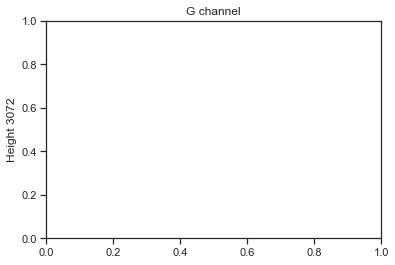

In [11]:
# Plotting Images
plt.title('G channel')
plt.ylabel('Height {}'.format(X_train[1].shape[0]))
plt.xlabel('Width {}'.format(X_train[1].shape[1]))

plt.imshow(X_train[1][ : , : , 0])
plt.show()

